In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import geopandas
import plotly.express as px
import numpy
import seaborn as sns

In [3]:
def country_query(table, *countries):
    query_str = ""
    if type(countries) == str:
        query_str += "Country == '" + countries + "'"
    else:
        for country in countries:
            query_str += "or Country == '" + country + "'"
        query_str = query_str[2:]

    return table.query(query_str)

In [4]:
url = "../Data/Annual_population_eurostat(mandatory).csv"
table = pd.read_csv(url)

query = country_query(table, "Germany").query("sex == 'T'").sort_values("2024", ascending=False)

# query = table.query("citizen == 'TOTAL' and sex =='T'").sort_values("2024 ")

display(query.head(20))

,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
452,Germany,DEU,TOTAL,T,81197537.0,82175684.0,82521653.0,82792351.0,83019213.0,83166711.0,83155031.0,83237124.0,83118501.0,83456045.0
158,Germany,DEU,NAT,T,73657763.0,73523726.0,73301664.0,73113483.0,72929921.0,72768689.0,72569978.0,72344071.0,71623366.0,71347057.0
341,Germany,DEU,STLS,T,8961.0,10264.0,11123.0,11406.0,11494.0,11360.0,11360.0,11155.0,20472.0,18883.0
551,Germany,DEU,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,Germany,DEU,EU28_FOR,T,3475492.0,3801044.0,3985165.0,4205194.0,4383694.0,4454418.0,NaN,NaN,NaN,NaN
248,Germany,DEU,NEU28_FOR,T,4055321.0,4840650.0,5223701.0,5462268.0,5694104.0,5932244.0,NaN,NaN,NaN,NaN


[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
[np.float64(90.7142823802648), np.float64(89.47138912771325), np.float64(88.82718818053729), np.float64(88.30946593121868), np.float64(87.8470396967025), np.float64(87.4973750013993), np.float64(87.27070043422869), np.float64(86.91322756418158), np.float64(86.17018490263678), np.float64(85.49058010117781)]


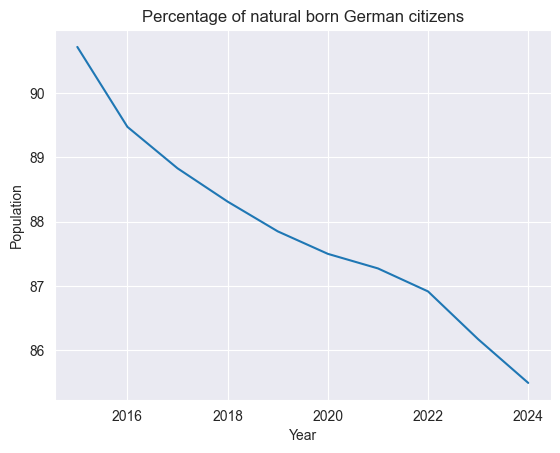

In [5]:
pop_new = []
for i in range(10):
    pop_new.append(table.iloc[158, i + 4] / table.iloc[452, i + 4] * 100)

years = [x for x in range(2015, 2025, 1)]

print(years)
print(pop_new)

figure, axes = plt.subplots()
axes.plot(years, pop_new)

axes.set_xlabel('Year')
axes.set_ylabel('Population')
axes.set_title('Percentage of natural born German citizens')
pass

7.4.2025

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

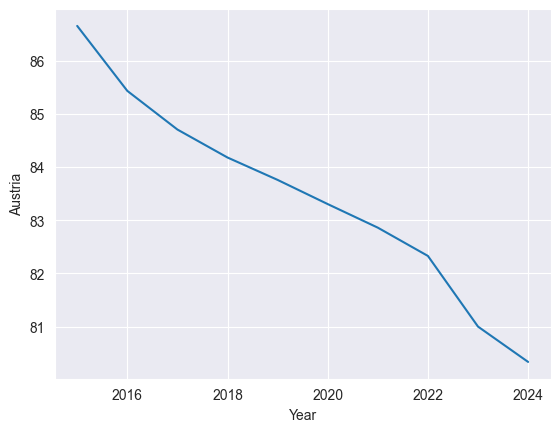

In [38]:
unique_states = pd.read_csv(url).loc[:, "Country"].unique()
all_countries = country_query(table, *unique_states).query("sex == 'T'").sort_values("2024", ascending=False)
queries = [country_query(table, i).query("sex == 'T'").sort_values("2024", ascending=False) for i in unique_states]
figure, axes = plt.subplots()
mean_nationals = [0] * len(queries)

for i in range(len(queries)):
    try:
        axes.plot(years, queries[i].iloc[1].iloc[-10:] / queries[i].iloc[0].iloc[-10:] * 100)
        axes.set_xlabel('Year')
        axes.set_ylabel(unique_states[i])
        if queries[i].iloc[1].iloc[-10:] / queries[i].iloc[0].iloc[-10:] * 100:
            mean_nationals[i] += queries[i].iloc[1].iloc[-10:] / queries[i].iloc[0].iloc[-10:] * 100
    except IndexError:
        pass

mean_nationals = [i / 10 for i in mean_nationals]
print(mean_nationals)
figure, axes = plt.subplots()
axes.plot(years, mean_nationals)

# print(queries[0].iloc[1].iloc[-10:]/queries[0].iloc[0].iloc[-10:])
# print(queries[1])
# pomocna = table.query("Country=='Belgium' & 'Year' in range(2015,2025)")
# print(pomocna)
# print(means)
# figure, axes = plt.subplots()
# axes.plot(years, means)
# axes.set_xlabel('Year')
# axes.set_ylabel('Population')
# axes.set_title('Percentage of natural born citizens (global)')